In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inferencepicture/catimage.jpg
/kaggle/input/animals10/translate.py
/kaggle/input/animals10/raw-img/cavallo/OIP-mdvOxIWAyReAoEJcMk5z4wHaJ4.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-TPYKs3XId_sMgp_6LLA6JgDMEy.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-jlVRrokx7Vu1axi8OnTX2AHaE2.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-F4QVZ71QagiynDMnFNxJUAHaEK.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-UFtUZnXq0JHZo5R8UuF80wHaFj.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-irWuWeIWd3Hm3BWGd0OEsQHaGO.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-Y-hB14A3coI7TEgrEew0UAHaFj.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-KqeKmYfnRwKd89nLg8_zRAHaHb.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-s40xdXSQY099gt1hLGlzAwHaFP.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-4k_sWoJ4_9-G1f0emDBVtwHaE6.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-W-uUxHx-yovp1DQNtX1qdQHaFk.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-Npxx8kemjjTljUyT9-BQgAHaFi.jpeg
/kaggle

In [29]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("alessiocorrado99/animals10")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animals10


In [30]:
import fastai
import pathlib
import ipywidgets
from fastai.vision.all import *

In [31]:
# Define path
path = pathlib.Path('/kaggle/input/animals10/raw-img')


print(path.ls())

[Path('/kaggle/input/animals10/raw-img/cavallo'), Path('/kaggle/input/animals10/raw-img/pecora'), Path('/kaggle/input/animals10/raw-img/elefante'), Path('/kaggle/input/animals10/raw-img/gatto'), Path('/kaggle/input/animals10/raw-img/scoiattolo'), Path('/kaggle/input/animals10/raw-img/gallina'), Path('/kaggle/input/animals10/raw-img/ragno'), Path('/kaggle/input/animals10/raw-img/mucca'), Path('/kaggle/input/animals10/raw-img/cane'), Path('/kaggle/input/animals10/raw-img/farfalla')]


In [32]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,  
    item_tfms=RandomResizedCrop(224, min_scale=0.5)
)

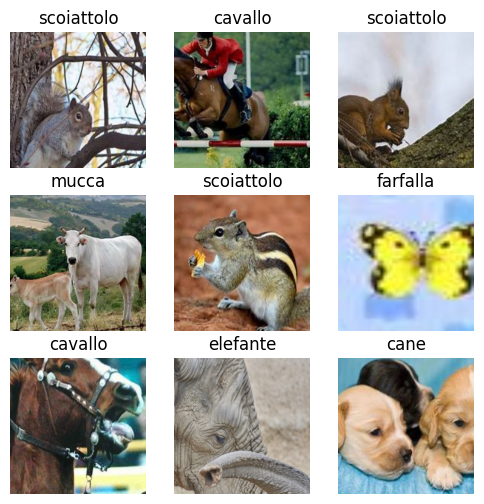

In [33]:
# Create DataLoaders
dls = dblock.dataloaders(path)

# Show a batch of images
dls.show_batch(max_n=9, figsize=(6,6))

In [34]:
for img in get_image_files(path)[:5]:
    print(img, "->", get_english_label(img))

/kaggle/input/animals10/raw-img/cavallo/OIP-mdvOxIWAyReAoEJcMk5z4wHaJ4.jpeg -> horse
/kaggle/input/animals10/raw-img/cavallo/OIP-TPYKs3XId_sMgp_6LLA6JgDMEy.jpeg -> horse
/kaggle/input/animals10/raw-img/cavallo/OIP-jlVRrokx7Vu1axi8OnTX2AHaE2.jpeg -> horse
/kaggle/input/animals10/raw-img/cavallo/OIP-F4QVZ71QagiynDMnFNxJUAHaEK.jpeg -> horse
/kaggle/input/animals10/raw-img/cavallo/OIP-UFtUZnXq0JHZo5R8UuF80wHaFj.jpeg -> horse


In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.268506,0.151138,0.044126,01:23


epoch,train_loss,valid_loss,error_rate,time
0,0.170759,0.120359,0.037058,01:32
1,0.162599,0.133439,0.039160,01:26


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(8, nrows=1)

In [ ]:
#Model export
learn.export()
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
#hide_output
from fastai.vision.widgets import ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)